# Autoencoder

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # (60000,28,28)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)
x_train.shape, x_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 784), (10000, 784))

## A simple Autoencoder

In [3]:
# encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(32, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [4]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))   # we discard the labels

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.0543 - val_loss: 0.0315
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0256 - val_loss: 0.0207
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0183 - val_loss: 0.0158
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0147 - val_loss: 0.0132
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0127 - val_loss: 0.0117


In [5]:
autoencoder.summary()
autoencoder.layers

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


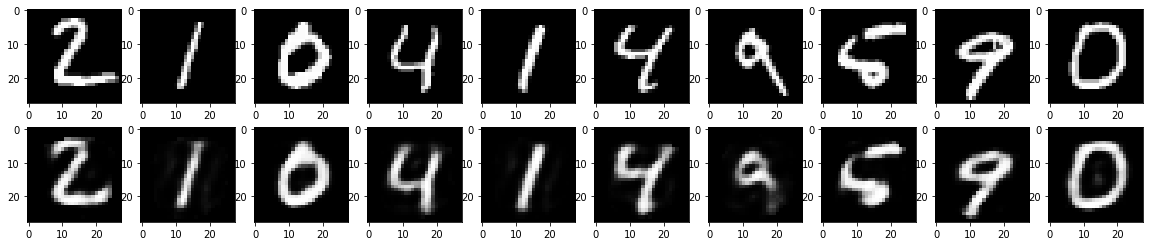

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))        # original
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  # reconstructed
    plt.gray()

plt.show()

## Deep autoencoder 

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

encoder = keras.Model(input_img, encoded)
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))

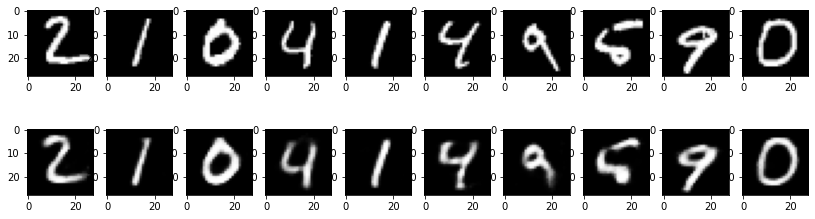

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(14, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()

plt.show()

- we can see that reconstruted data is more clear than the previous one.

# Convolutional autoencoder
- The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(input_img)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D(2, 2)(x)
encoder = keras.Model(input_img, encoded)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0     

In [ ]:
# at this point the representation of 'encoded' is (3, 3, 64) 

x = layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', 
                           padding='valid')(encoded)
x = layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', 
                           padding='same')(x)
x = layers.Conv2DTranspose(1, kernel_size=3, strides=2, activation='sigmoid', 
                           padding='same')(x)
decoded = layers.Reshape([28,28])(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0   

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
encoded.shape, decoded.shape

(TensorShape([None, 3, 3, 64]), TensorShape([None, 28, 28]))

In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 31s 11ms/step - loss: 0.1970 - val_loss: 0.1038
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0956 - val_loss: 0.0889
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0869 - val_loss: 0.0836
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0830 - val_loss: 0.0806
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0805 - val_loss: 0.0792


In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

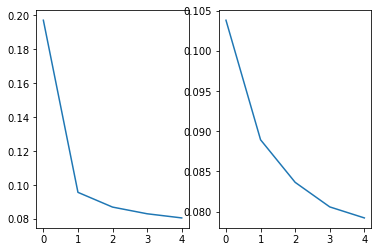

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'])         

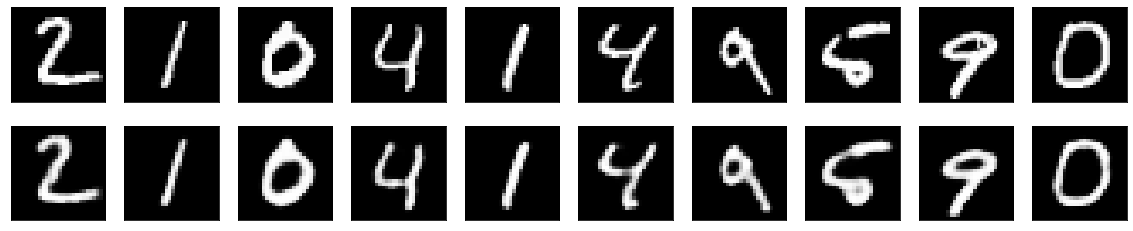

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- It should look better...

(10000, 3, 3, 64)


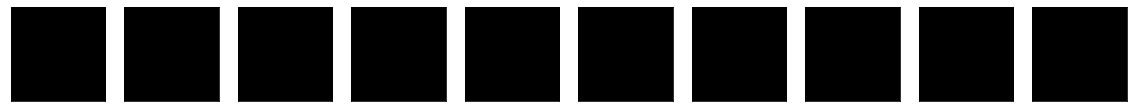

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.shape)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i][:,:,0])  # first kernel
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application to Image denoising
- It's simple: we will train the autoencoder to map noisy digits images to clean digits images.
- Here's how we will generate synthetic noisy digits: we just apply a gaussian noise matrix and clip the images between 0 and 1.

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

- Here's what the noisy digits look like:

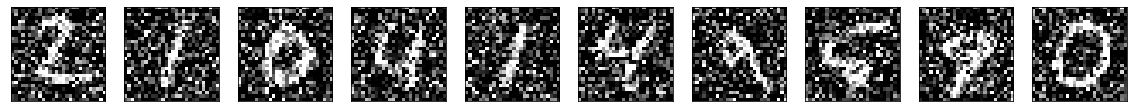

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Compared to the previous convolutional autoencoder, in order to improve the quality of the reconstructed, we'll use a slightly different model with more filters per layer:

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 36s 11ms/step - loss: 0.2507 - val_loss: 0.1588
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1452 - val_loss: 0.1319
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1277 - val_loss: 0.1213
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1198 - val_loss: 0.1158
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1154 - val_loss: 0.1125
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1127 - val_loss: 0.1105
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1107 - val_loss: 0.1091
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1092 - val_loss: 0.1084
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1081 - val_loss: 0.1065
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1071 - val_l

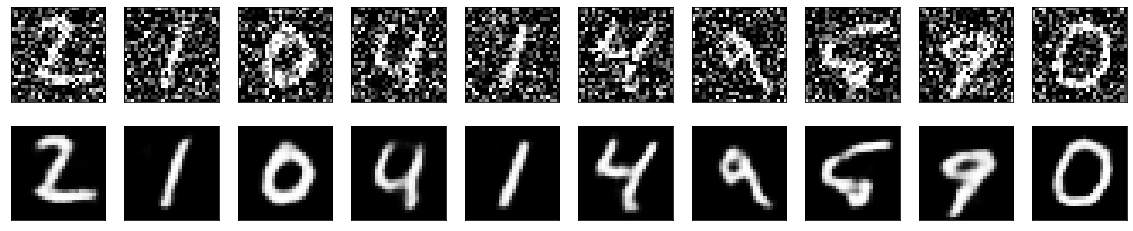

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- It seems to work pretty well. If you scale this process to a bigger convnet, you can start building document denoising or audio denoising models. Kaggle has an interesting dataset to get you started.

# Dimension Reduction using Autoencoders

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # (60000,28,28)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

encoder = keras.Model(input_img, encoded)
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.0693 - val_loss: 0.0564
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0532 - val_loss: 0.0500
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0482 - val_loss: 0.0468
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0459 - val_loss: 0.0449
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0441 - val_loss: 0.0433
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0428 - val_loss: 0.0426
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0419 - val_loss: 0.0415
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0412 - val_loss: 0.0408
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0406 - val_loss: 0.0404
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0402 - val_loss: 0.0401

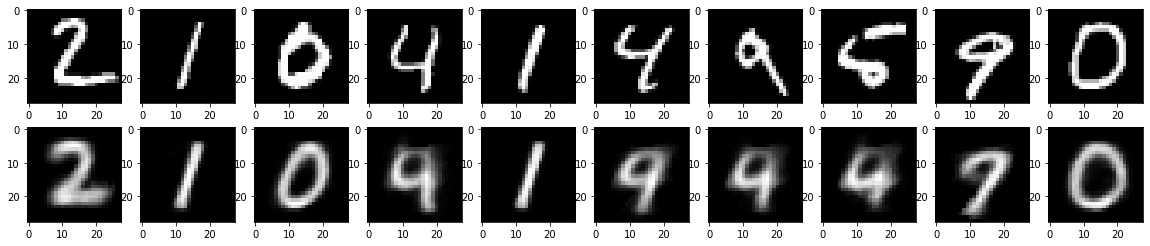

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))        # original
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  # reconstructed
    plt.gray()

plt.show()

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_train)
print(encoded_imgs.shape)

(60000, 2)


In [ ]:
y_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

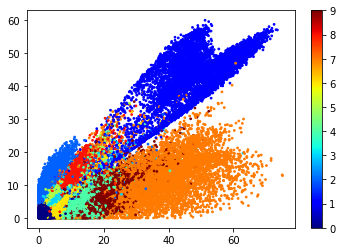

In [ ]:
import matplotlib

plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1], c=y_train, cmap='jet', s=3)
plt.colorbar()

# Using PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # (60000,28,28)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

In [ ]:
pca = PCA(32)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
approx = pca.inverse_transform(x_test_pca)

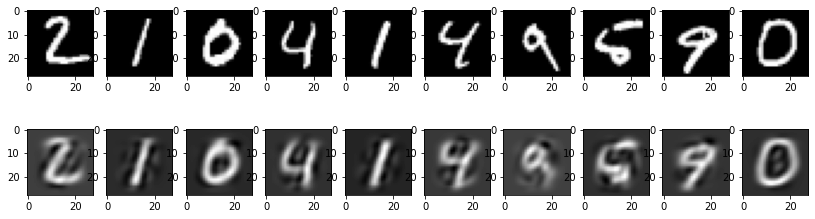

In [ ]:
n = 10
plt.figure(figsize=(14, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))        # original
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(approx[i].reshape(28, 28))  # reconstructed
    plt.gray()

plt.show()

- it is clearly visible that result from Autoencoder is way better.

In [ ]:
# use 100 principal components
pca = PCA(100)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
approx = pca.inverse_transform(x_test_pca)

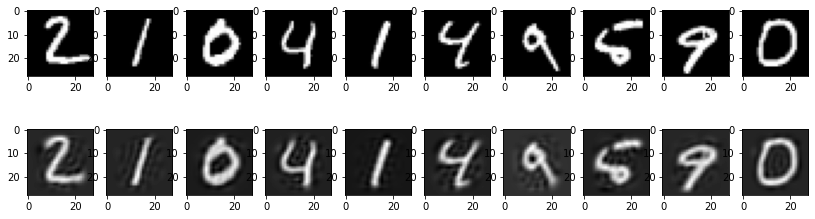

In [ ]:
n = 10
plt.figure(figsize=(14, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))        # original
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(approx[i].reshape(28, 28))  # reconstructed
    plt.gray()

plt.show()

- Difference between PCA and Autoencoder?
  - PCA is an linear transformation where given set of data approximated by straight line.
  - While Autoencoder can learn non linearity structure which is present in data.
  - If we don’t impose any non linearity in network then Autoencoder and PCA are almost similar.

## try to see features in 2d

In [ ]:
pca = PCA(2)
x_train_pca = pca.fit_transform(x_train)
approx = pca.inverse_transform(x_train_pca)

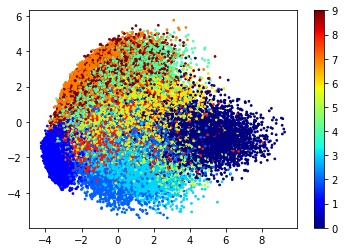

In [ ]:
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train, cmap='jet', s=3)
plt.colorbar()